# Project 2: Billboard Hits

## 1. About the data

From [Wikipedia](https://en.wikipedia.org/wiki/Billboard_Hot_100)

> The Billboard Hot 100 is the music industry standard record chart in the United States for singles, published weekly by Billboard magazine. **Chart rankings are based on radio play, online streaming, and sales (physical and digital).**

Also [here](http://pitchfork.com/features/article/9378-i-know-you-got-soul-the-trouble-with-billboards-rbhip-hop-chart/)
> Ideally, any effective genre chart—be it R&B, Latin, country, even alt-rock—doesn’t just track a particular strain of music, which can be marked by ever-changing boundaries and ultimately impossible to define. It’s meant to track an audience.

Another from [Wikipedia](https://en.wikipedia.org/wiki/Billboard_charts)
> What separates the charts is which stations and stores are used; each musical genre has a core audience or retail group. Each genre's department at Billboard is headed up by a chart manager, who makes these determinations.

## 2. Problem statement

- Does the rank at which a track enters the top 100 have any relation to whether it will eventually reach the top 10?
- Does the length of a track have any relation to its highest rank attainable?

## 3. Importing relevant libraries

In [771]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

## 4. Loading the data

In [772]:
# set na_values as asterisks
df = pd.read_csv('assets/billboard.csv', na_values='*')

In [773]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 5. Risks & Assumptions

**Assumptions**
- The data contains a record of the tracks which hit the top 100
- The genre of the song/ artist is correctly categorized based on the radio stations that played it/ streaming data
- The columns beginning with 'x' indicate a timeline, where x1st.week is the first week that the track enters the top 100
- The columns beginning with 'x' contain the rank of the track if it was currently in the top 100 and a null value if it was no longer within  the top 100

**Risks**
- There may not be enough data to answer the problem statements
    - Sample size is too small
    - Data is only from 1 year

## 6. Cleaning the data

### a. Is the column 'year' useful?

In [774]:
df['year'].value_counts()

2000    317
Name: year, dtype: int64

**There's only one value in the column so it wouldn't help much.**  
i.e. The data contains a record of the tracks which hit the top 100 for the year 2000

### b. Cleaning artist name column

In [775]:
names = df['artist.inverted'].unique()

In [776]:
print sorted(names)

['2 Pac', '2Ge+her', '3 Doors Down', '504 Boyz', '98\xa1', 'A*Teens', 'Aaliyah', 'Adams, Yolanda', 'Adkins, Trace', 'Aguilera, Christina', 'Alice Deejay', 'Allan, Gary', 'Amber', 'Anastacia', 'Anthony, Marc', 'Avant', 'BBMak', 'Backstreet Boys, The', 'Badu, Erkyah', 'Baha Men', 'Barenaked Ladies', 'Beenie Man', 'Before Dark', 'Bega, Lou', 'Big Punisher', 'Black Rob', 'Black, Clint', 'Blaque', 'Blige, Mary J.', 'Blink-182', 'Bloodhound Gang', 'Bon Jovi', 'Braxton, Toni', 'Brock, Chad', 'Brooks & Dunn', 'Brooks, Garth', 'Byrd, Tracy', 'Cagle, Chris', "Cam'ron", 'Carey, Mariah', 'Carter, Aaron', 'Carter, Torrey', 'Changing Faces', 'Chesney, Kenny', 'Clark Family Experience', 'Clark, Terri', 'Common', 'Counting Crows', 'Creed', 'Cyrus, Billy Ray', "D'Angelo", 'DMX', 'Da Brat', 'Davidson, Clay', 'De La Soul', "Destiny's Child", 'Diffie, Joe', 'Dion, Celine', 'Dixie Chicks, The', 'Dr. Dre', 'Drama', 'Dream', 'Eastsidaz, The', 'Eiffel 65', 'Elliott, Missy "Misdemeanor"', 'Eminem', 'En Vogue',

**Seems like the names are in order (I tried to look through everything) and no further cleaning is required at the moment.**

### c. What about the column 'time'?

It looks like it refers to the length of the track. Let's format it to return length of the track in seconds.

Each value seems to be formatted: m,s,ms. For the purposes of this project, we will drop the millisecond(ms).

In [777]:
def get_sec(x):
    x_list = x.split(',')
    return int(x_list[0]) * 60 + int(x_list[1])


In [778]:
df['track_length_seconds'] = df['time'].map(get_sec)

In [779]:
# set a cut-off for long or short songs
df['length_track'] = df['track_length_seconds'].map(lambda x: 'Long' if x >= 250 else 'Short')

### d. Cleaning the 'genre' column

In [780]:
genres = df['genre'].unique()

In [781]:
print sorted(genres)

['Country', 'Electronica', 'Gospel', 'Jazz', 'Latin', 'Pop', 'R & B', 'R&B', 'Rap', 'Reggae', 'Rock', "Rock'n'roll"]


- Rock and Rock'n'roll will be combined to Rock
- R & B and R&B will be combined to R&B

In [782]:
def clean_genre(x):
    if x == 'R & B':
        return 'R&B'
    elif x == "Rock'n'roll":
        return 'Rock'
    else:
        return x

In [783]:
df['genre_clean'] = df['genre'].map(clean_genre)

In [784]:
genre_df = pd.DataFrame(df['genre_clean'].value_counts())
genre_df.columns = ['count']
genre_df['percent'] = genre_df['count']/float(len(genre_df))
genre_df

,count,percent
Rock,137,13.7
Country,74,7.4
Rap,58,5.8
R&B,23,2.3
Pop,9,0.9
Latin,9,0.9
Electronica,4,0.4
Gospel,1,0.1
Jazz,1,0.1
Reggae,1,0.1


- All records that make up less than 1% of the dataset will be combined as others

In [785]:
genres = df['genre_clean'].unique()
genres

array(['Rock', 'Latin', 'Country', 'Rap', 'Pop', 'Electronica', 'Jazz',
       'R&B', 'Reggae', 'Gospel'], dtype=object)

In [786]:
def genre_others(g):
    if g in genres[-6:]:
        return "Others"
    else:
        return g

In [787]:
df['genre_clean'] = df['genre_clean'].map(genre_others)

In [788]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,track_length_seconds,length_track,genre_clean
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218,Short,Rock
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258,Long,Rock
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247,Short,Rock
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225,Short,Rock
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218,Short,Rock


### e. Formatting the columns 'date.entered' and 'date.peaked'

In [789]:
df['date_entered'] = df['date.entered'].map(pd.to_datetime)
df['date_peaked'] = df['date.peaked'].map(pd.to_datetime)

In [790]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,track_length_seconds,length_track,genre_clean,date_entered,date_peaked
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,218,Short,Rock,2000-09-23,2000-11-18
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,258,Long,Rock,2000-02-12,2000-04-08
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,247,Short,Rock,1999-10-23,2000-01-29
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,225,Short,Rock,2000-08-12,2000-09-16
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,218,Short,Rock,2000-08-05,2000-10-14


Let's add a column that shows the number of weeks a track took to peak on the billboard.

In [791]:
df['weeks_to_peak'] = df['date_peaked'] - df['date_entered']

In [792]:
df['weeks_to_peak'].head()

0   56 days
1   56 days
2   98 days
3   35 days
4   70 days
Name: weeks_to_peak, dtype: timedelta64[ns]

In [793]:
def get_weeks(x):
    y = str(x).split()
    return float(y[0])/7.

In [794]:
df['weeks_to_peak'] = df['weeks_to_peak'].map(get_weeks)

Adding a column for season:
- Spring: March to May
- Summer: June to August
- Fall: September to November
- Winter: December to February

In [795]:
def get_season(x):
    x = x.month
    if x <=5 and x >= 3:
        return ['Spring', 0]
    elif x <= 8 and x >= 6:
        return ['Summer', 1]
    elif x <= 11 and x >= 9:
        return ['Fall', 2]
    else:
        return ['Winter', 3]

In [796]:
df['season'] = df['date_entered'].map(lambda x: get_season(x)[0])

### f. Formatting the timeline

In [797]:
df.dropna(how='all', axis=1, inplace=True)

In [798]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x63rd.week,x64th.week,x65th.week,track_length_seconds,length_track,genre_clean,date_entered,date_peaked,weeks_to_peak,season
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63.0,49.0,...,NaN,NaN,NaN,218,Short,Rock,2000-09-23,2000-11-18,8.0,Fall
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8.0,6.0,...,NaN,NaN,NaN,258,Long,Rock,2000-02-12,2000-04-08,8.0,Winter
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48.0,43.0,...,NaN,NaN,NaN,247,Short,Rock,1999-10-23,2000-01-29,14.0,Fall
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23.0,18.0,...,NaN,NaN,NaN,225,Short,Rock,2000-08-12,2000-09-16,5.0,Summer
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47.0,45.0,...,NaN,NaN,NaN,218,Short,Rock,2000-08-05,2000-10-14,10.0,Summer


**Some of the weeks were totally empty! So we got rid of them.**

### h. How long does a track stay on the billboard?

In [799]:
# count returns the number of non-NA/ null observations

df['weeks_on_billboard'] = df.iloc[:,7:72].count(axis=1)

In [800]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x64th.week,x65th.week,track_length_seconds,length_track,genre_clean,date_entered,date_peaked,weeks_to_peak,season,weeks_on_billboard
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63.0,49.0,...,NaN,NaN,218,Short,Rock,2000-09-23,2000-11-18,8.0,Fall,28
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8.0,6.0,...,NaN,NaN,258,Long,Rock,2000-02-12,2000-04-08,8.0,Winter,26
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48.0,43.0,...,NaN,NaN,247,Short,Rock,1999-10-23,2000-01-29,14.0,Fall,33
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23.0,18.0,...,NaN,NaN,225,Short,Rock,2000-08-12,2000-09-16,5.0,Summer,24
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47.0,45.0,...,NaN,NaN,218,Short,Rock,2000-08-05,2000-10-14,10.0,Summer,21


In [801]:
df['weeks_on_billboard'].describe()

count    317.000000
mean      16.741325
std        9.083785
min        1.000000
25%       10.000000
50%       18.000000
75%       20.000000
max       57.000000
Name: weeks_on_billboard, dtype: float64

### i. What is the highest rank obtained by a track?

In [802]:
df['highest_rank'] = df.iloc[:,7:72].min(axis=1)

In [803]:
df['highest_rank'].unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  11.,  12.,
        13.,  14.,  15.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,
        25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,
        36.,  37.,  38.,  39.,  40.,  42.,  43.,  44.,  45.,  47.,  48.,
        49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,
        60.,  61.,  62.,  63.,  64.,  65.,  67.,  68.,  69.,  70.,  71.,
        72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  83.,
        84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  95.,
        96.,  97.,  98.,  99.])

#### How many ranks did the track climb to reach the top?

In [804]:
df['ranks_climbed'] = -(df['highest_rank'] - df['x1st.week'])

Adding the position at which the track entered the charts (i.e. renaming x1st.week)

In [805]:
df['rank_entered'] = df['x1st.week']

In [806]:
def get_last_rank(x):
    row = df[df['track'] == x].index.values[0]
    l = df.iloc[row,7:72].tolist()
    r = 0
    for i in l:
        if i > 0:
            r = i
    return r

In [807]:
df['last_rank'] = df['track'].map(get_last_rank)

### j. Getting a clean data frame

In [808]:
print df.columns.values.tolist()

['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered', 'date.peaked', 'x1st.week', 'x2nd.week', 'x3rd.week', 'x4th.week', 'x5th.week', 'x6th.week', 'x7th.week', 'x8th.week', 'x9th.week', 'x10th.week', 'x11th.week', 'x12th.week', 'x13th.week', 'x14th.week', 'x15th.week', 'x16th.week', 'x17th.week', 'x18th.week', 'x19th.week', 'x20th.week', 'x21st.week', 'x22nd.week', 'x23rd.week', 'x24th.week', 'x25th.week', 'x26th.week', 'x27th.week', 'x28th.week', 'x29th.week', 'x30th.week', 'x31st.week', 'x32nd.week', 'x33rd.week', 'x34th.week', 'x35th.week', 'x36th.week', 'x37th.week', 'x38th.week', 'x39th.week', 'x40th.week', 'x41st.week', 'x42nd.week', 'x43rd.week', 'x44th.week', 'x45th.week', 'x46th.week', 'x47th.week', 'x48th.week', 'x49th.week', 'x50th.week', 'x51st.week', 'x52nd.week', 'x53rd.week', 'x54th.week', 'x55th.week', 'x56th.week', 'x57th.week', 'x58th.week', 'x59th.week', 'x60th.week', 'x61st.week', 'x62nd.week', 'x63rd.week', 'x64th.week', 'x65th.week', 'track_length_

In [809]:
df2 = df.copy()
columns = ['artist.inverted', 'track', 'track_length_seconds', 'length_track','genre_clean', \
           'date_entered', \
           'date_peaked', 'season', 'weeks_to_peak',\
           'weeks_on_billboard', 'rank_entered', \
           'highest_rank', 'ranks_climbed', 'last_rank',\
           'x1st.week', 'x2nd.week', 'x3rd.week', 'x4th.week', 'x5th.week', 'x6th.week', 'x7th.week', 'x8th.week', \
           'x9th.week', 'x10th.week', 'x11th.week', 'x12th.week', 'x13th.week', 'x14th.week', 'x15th.week', \
           'x16th.week', 'x17th.week', 'x18th.week', 'x19th.week', 'x20th.week', 'x21st.week', 'x22nd.week', \
           'x23rd.week', 'x24th.week', 'x25th.week', 'x26th.week', 'x27th.week', 'x28th.week', 'x29th.week', \
           'x30th.week', 'x31st.week', 'x32nd.week', 'x33rd.week', 'x34th.week', 'x35th.week', 'x36th.week', \
           'x37th.week', 'x38th.week', 'x39th.week', 'x40th.week', 'x41st.week', 'x42nd.week', 'x43rd.week', \
           'x44th.week', 'x45th.week', 'x46th.week', 'x47th.week', 'x48th.week', 'x49th.week', 'x50th.week', \
           'x51st.week', 'x52nd.week', 'x53rd.week', 'x54th.week', 'x55th.week', 'x56th.week', 'x57th.week', \
           'x58th.week', 'x59th.week', 'x60th.week', 'x61st.week', 'x62nd.week', 'x63rd.week', 'x64th.week', \
           'x65th.week']

In [810]:
df2 = df2[columns]

In [811]:
df2.shape

(317, 79)

In [812]:
column_names = df2.columns.values.tolist()
column_names = column_names[:14]
column_names.extend(range(1,66))

In [813]:
df2.columns = column_names

In [814]:
df2.head()

,artist.inverted,track,track_length_seconds,length_track,genre_clean,date_entered,date_peaked,season,weeks_to_peak,weeks_on_billboard,...,56,57,58,59,60,61,62,63,64,65
0,Destiny's Child,Independent Women Part I,218,Short,Rock,2000-09-23,2000-11-18,Fall,8.0,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Santana,"Maria, Maria",258,Long,Rock,2000-02-12,2000-04-08,Winter,8.0,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Savage Garden,I Knew I Loved You,247,Short,Rock,1999-10-23,2000-01-29,Fall,14.0,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Madonna,Music,225,Short,Rock,2000-08-12,2000-09-16,Summer,5.0,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218,Short,Rock,2000-08-05,2000-10-14,Summer,10.0,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 7. Visualizing the data

In [815]:
dist_cols = ['track_length_seconds', 'weeks_to_peak', 'weeks_on_billboard',\
     'rank_entered', 'highest_rank', 'ranks_climbed', 'last_rank']

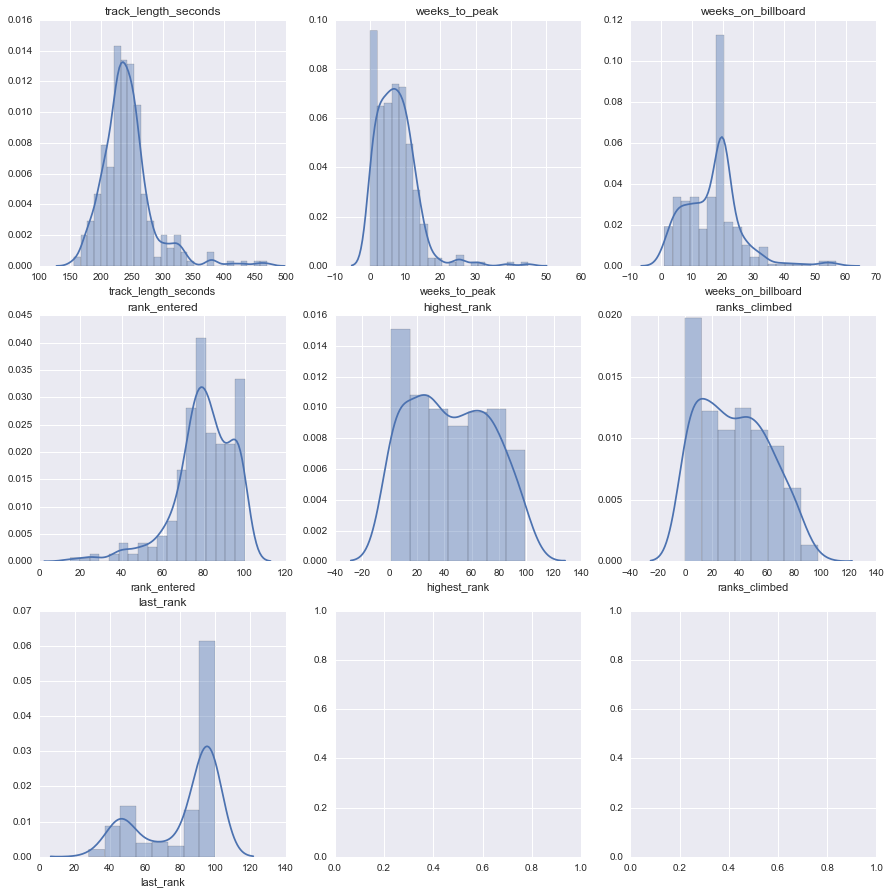

In [816]:
fig, ax = plt.subplots(3,3, figsize=(15,15));
for i in range(len(dist_cols)):
    r = i/3
    c = i - (r*3)
    ax[r][c] = sns.distplot(df2[dist_cols[i]], ax=ax[r][c]);
    ax[r][c].set_title(dist_cols[i]);


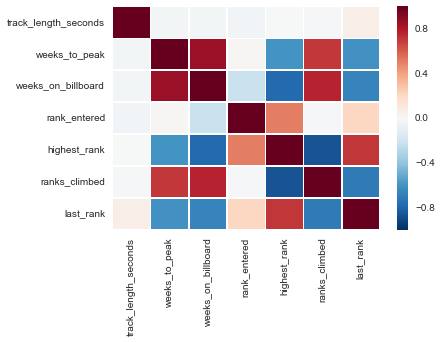

In [817]:
sns.heatmap(df2[dist_cols].corr(), linewidths=0.5);

- weeks_to_peak, weeks_on_billboard and ranks_climbed seem to be correlated
    - a track that had to climb many ranks to reach its peak is likely to take longer to peak and also stay on the billboard longer
    - however, there is a low correlation between any of these and the entering_rank_group
        - it seems that it doesn't matter what rank a track enters the top 100
        - it can still climb many ranks and stay on the billboard for a long time
- rank_entered and highest_rank
    - this is one of our problem statements!

In [818]:
# we'll plot the progress of some of the tracks over the weeks
def gen_20_plots(start):
    fig, ax = plt.subplots(4,5, figsize=(16,10), sharex=True, sharey=True);
    for i in range(start,start+20):
        x = i - start
        r = x / 5
        c = x - (r*5)
        ax[r][c] = df2.iloc[i,13:].plot(rot=45, ax=ax[r][c]).set_title(df2.iloc[i,1]);
    fig.text(0.45, 0.04, 'Weeks', fontsize=25)
    fig.text(0.04, 0.5, 'Rank', fontsize=25, rotation='vertical')

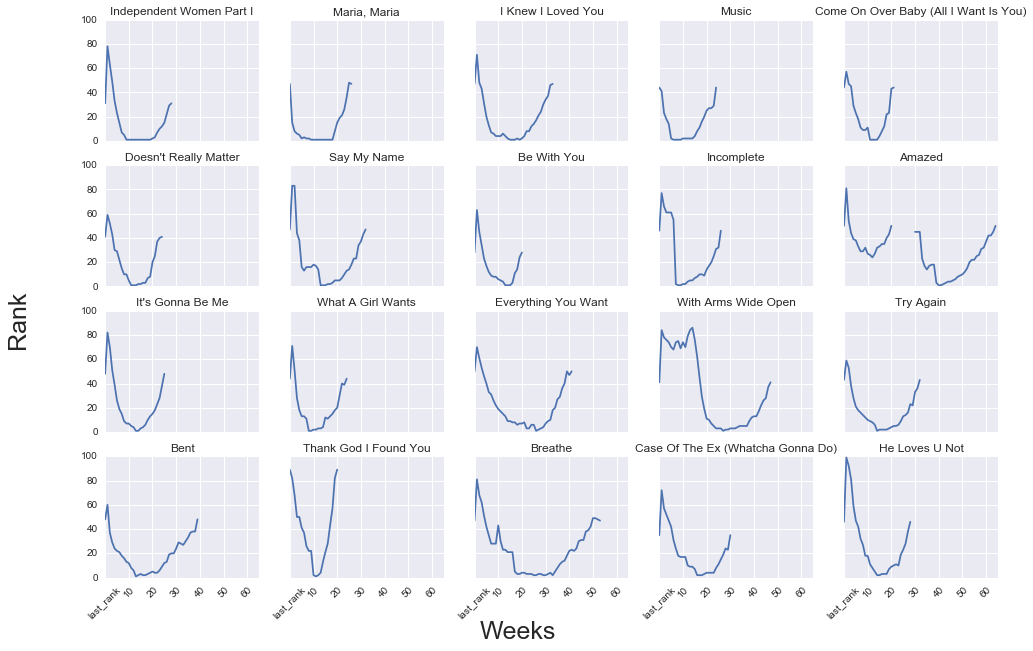

In [819]:
gen_20_plots(0)

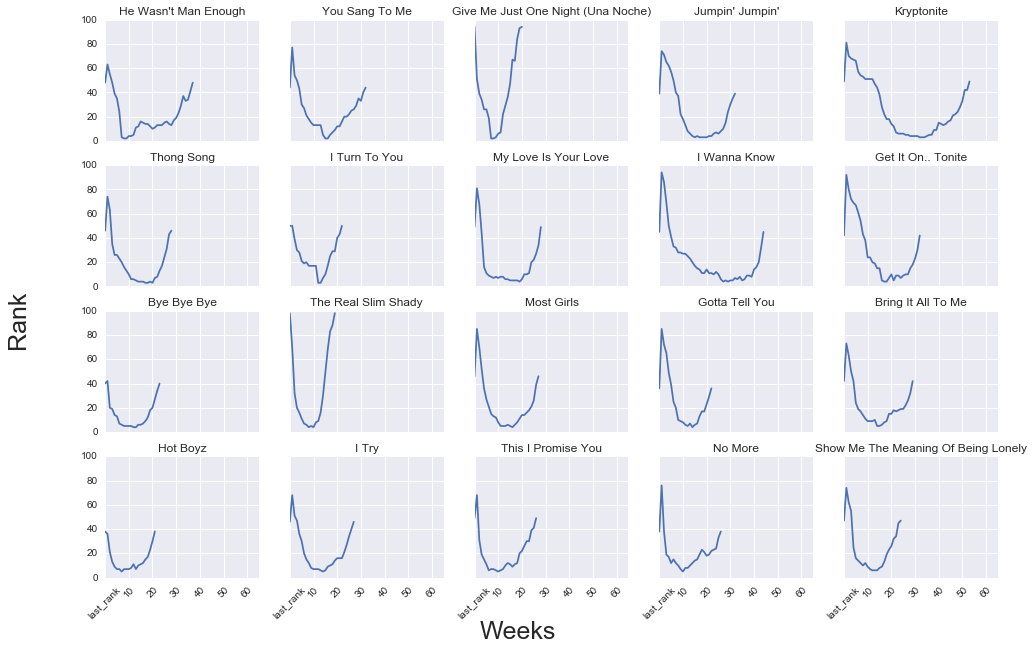

In [820]:
gen_20_plots(20)

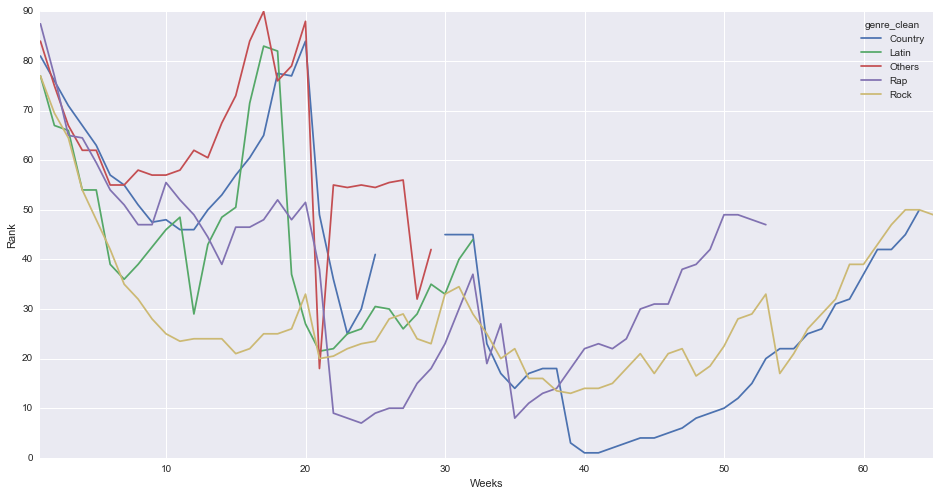

In [821]:
# let's look at how the ranks changed over the weeks by genre
weeks = range(1,66)
ax_g = df2.groupby('genre_clean')[weeks].median().T.plot(figsize=(16,8));
ax_g.set_xlabel('Weeks');
ax_g.set_ylabel('Rank');

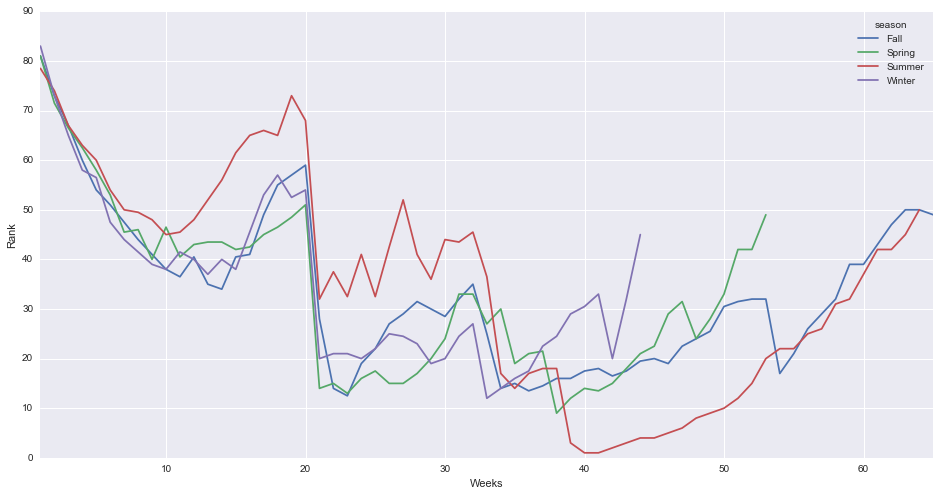

In [822]:
# then by seasons
ax_s = df2.groupby('season')[weeks].median().T.plot(figsize=(16,8));
ax_s.set_xlabel('Weeks');
ax_s.set_ylabel('Rank');

- There doesn't seem to be significant difference in the way ranks change by the seasons
- But it does seem like tracks which enter the top 100 in summer stay for a shorter period of time

In [823]:
df2[['track_length_seconds', 'weeks_to_peak', 'weeks_on_billboard',\
     'rank_entered', 'highest_rank', 'ranks_climbed', 'last_rank']].describe()

,track_length_seconds,weeks_to_peak,weeks_on_billboard,rank_entered,highest_rank,ranks_climbed,last_rank
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,242.425868,7.463722,16.741325,79.958991,44.123028,35.835962,80.804416
std,42.401618,5.838229,9.083785,14.686865,29.223722,25.061031,21.518896
min,156.000000,0.000000,1.000000,15.000000,1.000000,-0.000000,28.000000
25%,219.000000,3.000000,10.000000,74.000000,20.000000,14.000000,62.000000
50%,236.000000,7.000000,18.000000,81.000000,42.000000,33.000000,92.000000
75%,257.000000,10.000000,20.000000,91.000000,70.000000,56.000000,97.000000
max,470.000000,45.000000,57.000000,100.000000,99.000000,97.000000,100.000000


In [824]:
df2['highest_rank'][df2['highest_rank'] == 1.0].count()

17

In [825]:
x = sorted(df2['rank_entered'][df2['highest_rank'] == 1.0].tolist())
x

[15, 41, 57, 59, 59, 60, 63, 70, 71, 71, 77, 78, 81, 82, 82, 83, 84]

- 'weeks_to_peak' has a minimum value of 0
    - There are tracks which hit their highest rank the moment they got into top 100
- 'weeks_to_peak' has a median value of 7
    - On average, it takes a track 7 weeks to hit its highest rank
- 'weeks_on_billboard' has a median value of 18
    - On average, tracks stayed in the top 100 for 18 weeks
- 'weeks_on_billboard' has a minimum value of 1
    - There are track(s) which were only in the top 100 for a week
- only 16 tracks reached the number 1 spot


#### For the tracks that got to number 1, how long did they take?

In [826]:
df2[['weeks_to_peak']][df2['highest_rank'] == 1.0].describe()

,weeks_to_peak
count,17.000000
mean,13.529412
std,8.668316
min,5.000000
25%,8.000000
50%,12.000000
75%,13.000000
max,39.000000


#### What is the highest rank obtained by each genre and how many tracks of each genre hit the top 100?

In [827]:
pd.pivot_table(df, index=['genre_clean'], values=['highest_rank'],aggfunc=[min, len], margins=True)

,min,len
,highest_rank,highest_rank
genre_clean,,
Country,1.0,74.0
Latin,1.0,9.0
Others,5.0,39.0
Rap,2.0,58.0
Rock,1.0,137.0
All,1.0,317.0


## 8. Going back to our problem statements

### Does the rank at which a track enters the top 100 have any relation to whether it will eventually reach the top 10?

$$H_0:\ Top\ 10\ tracks\ have\ the\ same\ median\ rank\ entering\ the\ Hot\ 100\ as\ non-Top\ 10\ tracks.$$

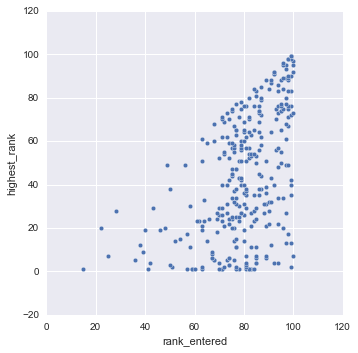

In [828]:
sns.pairplot(df2,x_vars='rank_entered', y_vars='highest_rank', size=5);

In [829]:
df2['reached_top_10'] = df2['highest_rank'].map(lambda x: True if x <= 10 else False)

In [830]:
# median entering rank of tracks that reached top 10
df2['rank_entered'][df2['reached_top_10'] == True].median()

74.0

In [831]:
# median entering rank of tracks that did not reach top 10
df2['rank_entered'][df2['reached_top_10'] == False].median()

82.0

In [832]:
diff_ranks = df2['rank_entered'][df2['reached_top_10'] == False].median() - \
df2['rank_entered'][df2['reached_top_10'] == True].median()

In [833]:
diff_ranks

8.0

What is the probability that the average entering rank of top 10 songs is at least 8 ranks above the average entering rank of non top 10 songs?

Since our dataset is small, we will be using the shuffling method to test the above.  
Let's set significance level at 5%.

In [843]:
trials = 100000
counter = 0
t1 = df2['rank_entered']
top_L = df2['track'][df2['reached_top_10'] == True].count()
for i in range(trials):
    t2 = np.random.permutation(t1)
    top = t2[:top_L]
    bottom = t2[top_L:]
    diff = np.median(bottom) - np.median(top)
    if diff >= 8:
        counter += 1.0000
print 'p-value: {}%'.format((counter/trials)*100)

p-value: 0.001%


- Based on the above, the probability of a top 10 track having an entering rank that is 8 ranks or higher than a non-top 10 track is less than 5%
- i.e. the probability that we will see the result by chance is very low if there was actually no difference
- Hence, we can say that it is not true that the entering rank of a track has no influence on how high on the chart it can go
    - i.e. the rank at which a track enters the top 100 does have an effect on whether it can eventually reach the top 10

### Does the length of a track have any relation to its highest rank attainable?

$$H_0:\ The\ median\ of\ the\ highest\ rank\ attained\ by\ short\ tracks\ is\ the\ same\ as\ that\ by\ the\ long\ tracks.$$

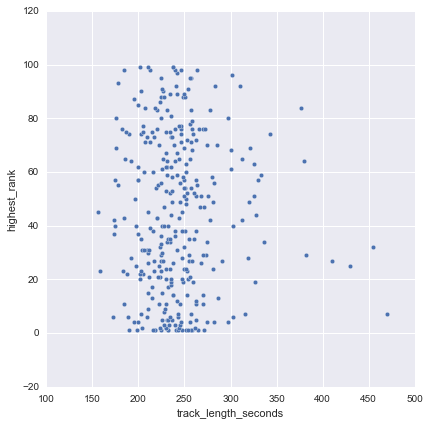

In [835]:
sns.pairplot(df, x_vars='track_length_seconds', y_vars='highest_rank', size=6);

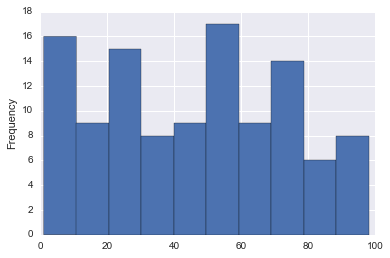

In [836]:
df2['highest_rank'][df2['length_track']=='Long'].plot(kind='hist');

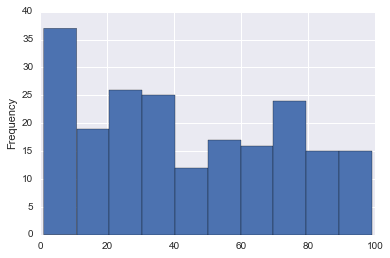

In [837]:
df2['highest_rank'][df2['length_track']=='Short'].plot(kind='hist');

In [838]:
# median highest rank of long tracks
df2['highest_rank'][df2['length_track'] == 'Long'].median()

49.0

In [839]:
# median highest rank of short tracks
df2['highest_rank'][df2['length_track'] == 'Short'].median()

40.0

In [840]:
diff_ranks_2 = df2['highest_rank'][df2['length_track'] == 'Short'].median() - \
df2['highest_rank'][df2['length_track'] == 'Long'].median()

In [841]:
diff_ranks_2

-9.0

What is the probability that the average highest rank of short songs is at least 9 ranks above the average highest rank of long songs?

Since our dataset is small, we will be using the shuffling method to test the above.  
Let's set significance level at 5%.

In [844]:
trials = 20000
counter = 0
t3 = df2['highest_rank']
long_L = df2['track'][df2['length_track'] == 'Long'].count()
for i in range(trials):
    t4 = np.random.permutation(t3)
    long_l = t4[:long_L]
    short_l = t4[long_L:]
    diff = np.median(long_l) - np.median(short_l)
    if diff >= 9:
        counter += 1.0000
print 'p-value: {}%'.format(counter/trials*100.)

p-value: 13.75%


- Based on the above, the probability of the average highest rank of a short song being at least 9 ranks higher than the average highest rank of a long song is 14% even if there is no relation between the two
- Hence, we cannot reject the null hypothesis
    - i.e. the length of a track doesn't matter when it comes to its rank